# Actividad: Regresión Lineal

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 17 de Agosto de 2023

---

**Instrucciones**

Utiliza un modelo de regresión lineal múltiple para predecir el salario en dolares (salary_in_usd) de cada empleado. Las variables regresoras de tu modelo deben de ser las siguientes: nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio).

## Solución

### Preparación de datos
Importamos las librerías necesarias

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm

Importamos la base de datos a utilizar.

In [90]:
db = pd.read_csv('ds_salaries.csv')

Observamos cuáles son las columnas (atributos) de nuestra base datos

In [91]:
db.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

Eliminamos las columnas que no utilizaremos


In [92]:
data = db.drop({'Unnamed: 0','work_year','job_title','salary_currency','salary_currency',
                'company_size','company_location','employee_residence'}, axis=1)
data

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50
...,...,...,...,...,...
602,SE,FT,154000,154000,100
603,SE,FT,126000,126000,100
604,SE,FT,129000,129000,0
605,SE,FT,150000,150000,100


Como requisito para una regresión lineal múltiple, a la matriz equivalente se le debe poder obtener su inversa. Para ello, necesitamos asegurarnos que la cantidad de columnas sea menor que la cantidad de filas, no deben de haber elementos nulos, no deben haber datos categóricos y los datos no deben ser correlacionados.

Para obtener el tamaño (cantidad de filas y columanas) de nuestro DataSet, utilizamos la función `shape`

In [93]:
data.shape

(607, 5)

De acuerdo a los datos obtenidos, observamos que el primer requisito es cumplido satisfactoriamente, teniendo un tamaño de 607 filas y 5 columnas

Para saber si tenemos elementos nulos, utilizamos la función `isnull()` y hacemos un conteo de los elementos con ayuda de la función `sum()`.

In [94]:
data.isnull().sum()

experience_level    0
employment_type     0
salary              0
salary_in_usd       0
remote_ratio        0
dtype: int64

De acuerdo a los resultados anteriores, observamos que no contamos con ningún elmento nulo en nuestro arreglo de datos, cumpliendo así con nuestro segundo requisito.

Para retirar los datos categóricos y sustituirlos por númericos, primero necesitamos conocer la cantidad de categorías de las columnas que contienen este tipo de datos (experience_level y employment_type).

In [95]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [96]:
data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

A continuación, utilizamos el método `pd.get_dummies()` para crear variables dummy para la columna "experience_level" del DataFrame. Esto nos permitirá convertir la columna categórica "experience_level" en cuatro columnas numéricas: una para "experience_level_EN", una para "experience_level_EX", una para "experience_level_MI" y una última para "experience_level_SE".

In [97]:
experience_dummies = pd.get_dummies(data['experience_level'], prefix = 'experience_level')
experience_dummies

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


Posteriromente, utilizamos el mismo método para crear variables dummy para la columna "employment_type" del DataFrame. Esto nos permitirá convertir la columna categórica "employment_type" en cuatro columnas numéricas: una para "employment_type_CT", una para "employment_type_FL", una para "employment_type_FT" y una última para "employment_type_PT".

In [98]:
employment_dummies = pd.get_dummies(data['employment_type'], prefix = 'employment_type')
employment_dummies

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


Concatenamos las columnas anteriormente obtenidas a nuestro DataFrame original `data`

In [99]:
data = pd.concat([data, experience_dummies , employment_dummies], axis=1)
data

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,SE,FT,154000,154000,100,0,0,0,1,0,0,1,0
603,SE,FT,126000,126000,100,0,0,0,1,0,0,1,0
604,SE,FT,129000,129000,0,0,0,0,1,0,0,1,0
605,SE,FT,150000,150000,100,0,0,0,1,0,0,1,0


Eliminamos las columnas originales que contienen datos categóricos (`experience_level` y `employment_type`). De esta forma, obtenemos un DataFrame que contiene únicamente datos numéricos.

In [100]:
data = data.drop({'experience_level','employment_type'}, axis=1)
data

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,0,1,0,0,1,0
2,85000,109024,50,0,0,0,1,0,0,1,0
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
602,154000,154000,100,0,0,0,1,0,0,1,0
603,126000,126000,100,0,0,0,1,0,0,1,0
604,129000,129000,0,0,0,0,1,0,0,1,0
605,150000,150000,100,0,0,0,1,0,0,1,0


Por último, calculamos la correlación de las variables para evitar que las variables regresoras estén relacionadas entre sí (que no entren en un intervalo de 0.95 a 1)

In [101]:
corr = data.corr()
corr

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
employment_type_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


De los valores anteriores, buscamos que no haya alguno mayor a 0.95 y menor a 1. Obtenemor las correlación alta.

In [102]:
alta_corr = np.where((corr > 0.95) & (corr < 1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

Para obtener la correlación baja, buscamos valores que sean menores a -0.95 y mayores a -1.

In [103]:
baja = np.where((corr < -0.95) & (corr > -1))
baja

(array([], dtype=int64), array([], dtype=int64))

Dados los datos anteriores, podemos notar que no contamos con datos correlacionados en nuestro DataFrame, cumpliendo con nuestro último requisito.

### Obtención del modelo
Preparamos los datos antes de meterlos al modelo, `random_state = 42` nos sirve para que cada que se corra nuevamente el progrmama, no se tome otro conjunto de datos aleatorio, sino que el mismo.

Importamos la función `train_test_split` de scikit-learn y lo utilizamos para dividir nuestro conjunto de datos en conjuntos de entrenamiento y prueba. `data` es nuestro conjunto de datos que deseamos dividir.

Con ayuda de `test_size=0.2` indicamos que queremos que el 20% de los datos se utilicen para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento. Establecemos una semilla con `random_state=42` para el generador de números aleatorios. Esto asegura que la división de los datos sea reproducible, es decir, si ejecutamos el mismo código nuevamente, obtendremos la misma división de datos.

In [104]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [105]:
train

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
9,125000,125000,50,0,0,0,1,0,0,1,0
227,75000,88654,50,0,0,1,0,0,0,1,0
591,144854,144854,100,0,0,0,1,0,0,1,0
516,152500,152500,100,0,0,0,1,0,0,1,0
132,38400,38400,100,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,37000,42197,50,0,0,1,0,0,0,1,0
106,235000,187442,100,0,0,1,0,0,0,1,0
270,72500,72500,100,1,0,0,0,0,0,1,0
435,70000,91614,100,0,0,1,0,0,0,1,0


In [106]:
test

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
563,140250,140250,100,0,0,0,1,0,0,1,0
289,135000,135000,100,0,0,0,1,0,0,1,0
76,100000,100000,100,0,0,1,0,0,0,1,0
78,270000,270000,100,0,0,1,0,1,0,0,0
182,22000,26005,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
249,170000,170000,100,0,0,0,1,0,0,1,0
365,138600,138600,100,0,0,0,1,0,0,1,0
453,120000,120000,100,0,0,1,0,0,0,1,0
548,99050,99050,100,0,0,0,1,0,0,1,0


Para poder construir el modelo, primero es necesario explorar las columnas presentes en el conjunto de datos utilizando el código `data.columns`. Esto nos dará una visión general de las variables disponibles para nuestro análisis.

In [107]:
data.columns

Index(['salary', 'salary_in_usd', 'remote_ratio', 'experience_level_EN',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT',
       'employment_type_PT'],
      dtype='object')

A continuación, construiremos nuestro modelo de regresión lineal para predecir los salarios en función de las siguientes variables independientes: `salary`, `remote_ratio`, `experience_level_EN`, `experience_level_EX`, `experience_level_MI`, `experience_level_SE`, `employment_type_CT`, `employment_type_FL` y `employment_type_FT`.

Utilizaremos la biblioteca `statsmodels` y la clase `ols` para definir nuestro modelo.

Después de definir nuestro modelo, lo ajustaremos a los datos utilizando el método `.fit()`. Esto calculará los coeficientes que mejor se ajustan a los datos y nos permitirá analizar la relación entre las variables independientes y la variable dependiente (`salary_in_usd` en este caso).

Finalmente, imprimiremos un resumen detallado del modelo utilizando el método `.summary()` proporcionado por `statsmodels`. Este resumen nos mostrará información importante sobre la calidad del ajuste del modelo, así como los coeficientes estimados para cada variable independiente.

In [108]:
model = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+experience_level_SE+employment_type_CT+employment_type_FL+employment_type_FT', data = train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        02:18:38   Log-Likelihood:                -6044.0
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     476   BIC:                         1.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.707e+04    

Obtenemos la ecuación de nuestro modelo, utilizando los coeficientes donde el p-valor es menor a 0.05 (se rechaza la hipótesis nula).

Obtenemos la ecuación de nuestro modelo, utilizando los coeficiantes obtenidos previamente.

In [109]:
y_aprox = 6.707e+04 - 0.0067*test['salary'] + 103.1885*test['remote_ratio'] - 4.405e+04*test['experience_level_EN'] + 9.742e+04*test['experience_level_EX'] - 1.71e+04*test['experience_level_MI'] + 3.08e+04*test['experience_level_SE'] + 7.688e+04*test['employment_type_CT'] - 3707.2560*test['employment_type_FL'] + 3.578e+04*test['employment_type_FT']
y_aprox

563    143029.175
289    143064.350
76      95398.850
78     135359.850
182     85602.600
          ...    
249    142829.850
365    143040.230
453     95264.850
548    143305.215
235     85013.000
Length: 122, dtype: float64

Repetimos el modelo, retirando los coeficientes donde el p-valor es menor a 0.05 (se rechaza la hipótesis nula). Dejando solo los coeficientes que más impacto tienen en la predicción, con la esperanza de obtener un mejor valor de $R^2$.

In [110]:
model2 = smf.ols(formula = 'salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI+experience_level_SE+employment_type_CT', data = train)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     33.04
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           5.65e-29
Time:                        02:18:38   Log-Likelihood:                -6046.6
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     479   BIC:                         1.213e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.008e+05   3

El valor $R^2$ (coeficiente de determinación) es una métrica estadística utilizada en modelos de regresión para evaluar cuánta variabilidad de la variable dependiente es explicada por las variables independientes incluidas en el modelo. En otras palabras, el $R^2$ mide qué proporción de la variabilidad total de la variable de respuesta puede ser "explicada" por las variables predictoras en el modelo. Por esta razón, decidimos quedarnos con el primer modelo, donde obtuvimos un mejor valor (más cercano a 1) de $R^2$.

Utilizando los coeficientes obtenidos anteriormente, establecemos la ecuación de nuestro modelo.

**Modelo:**

$f(x)= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dotsb + \beta_n x_n$




donde:

 $\beta_0 = 6.707\times 10^{4}, \quad \beta_1 = - 0.0067, \quad \beta_2 = 103.1885, \quad \beta_3 = -4.405\times 10^{4},$
 
 $\beta_4 = 9.742\times 10^{4}, \quad \beta_5 = -1.71\times 10^{4},\quad \beta_6 = 3.08\times 10^{4},$
 
 $\beta_7 = 7.688\times 10^{4}, \quad \beta_8 = -3707.256, \quad \beta_9 = 3.578\times 10^{4}$


Sustituyendo los valores anteriores, obtenemos la ecuación final del modelo:

$\therefore f(x)=6.707\times 10^{4} - 0.0067x_1 + 103.1885x_2-4.405\times 10^{4}x_3+9.742\times 10^{4}x_4$

$-1.71\times 10^{4}x_5+3.08\times 10^{4}x_6+7.688\times 10^{4}x_7-3707.256x_8+3.578\times 10^{4}x_9$



donde:

$x_1 = \text{salary}, \quad x_2 = \text{remote\_ratio}, \quad x_3 = \text{experience\_level\_EN},$

$x_4 = \text{experience\_level\_EX},x_5 = \text{experience\_level\_MI}, \quad x_6 = \text{experience\_level\_SE},$

$x_7 = \text{employment\_type\_CT}, \quad x_8 = \text{employment\_type\_FL},$

$x_9 = \text{employment\_type\_FT}.$

Ordenamos los datos en una tabla, comparando los datos reales y los aproximados

In [111]:
compare = pd.DataFrame ({'Real': test['salary_in_usd'], 'Predicción': y_aprox, 'Errores': test['salary_in_usd']-y_aprox})
compare

,Real,Predicción,Errores
563,140250,143029.175,-2779.175
289,135000,143064.350,-8064.350
76,100000,95398.850,4601.150
78,270000,135359.850,134640.150
182,26005,85602.600,-59597.600
...,...,...,...
249,170000,142829.850,27170.150
365,138600,143040.230,-4440.230
453,120000,95264.850,24735.150
548,99050,143305.215,-44255.215


## Grafiacación de resultados

### Gráfica de Dispersión (Scatter Plot) - Predicción vs. Datos Reales:

Esta gráfica muestra los datos reales de salarios en el eje x y las predicciones del modelo en el eje y. Los puntos en gris representan las predicciones del modelo para los salarios en el conjunto de prueba. La línea roja diagonal  (recta de 45°) representa la línea ideal donde los valores predichos serían iguales a los valores reales. Esta gráfica permite comparar visualmente las predicciones del modelo con los valores reales.

Text(0, 0.5, 'Predicción')

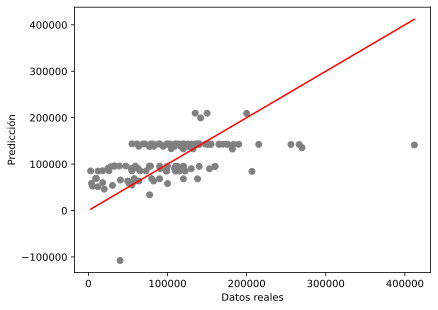

In [112]:
import matplotlib.pyplot as plt

plt.scatter(test['salary_in_usd'], y_aprox, color = 'gray')
plt.plot(test['salary_in_usd'], test['salary_in_usd'], color='red') # Recta y = x (45°)
plt.xlabel("Datos reales")
plt.ylabel("Predicción")

Considerando nuestro gráfico de dispersión de predicción vs datos reales obtenido, podemos notar que muy pocos puntos se encuentran cerca de la línea de 45°, lo que indica que las predicciones del modelo no son muy acercadas a los valores reales. La gráfica anterior sugiere que el modelo no es confiable en la predicción de eventos, no obstante, se hará un análisis de residuos para comprobar dicha hipótesis.

### Gráfica de Dispersión (Scatter Plot) - Residuos vs. Número de Residuo:

Aquí se muestra un gráfico de dispersión de los residuos (diferencia entre los valores reales y las predicciones) en función de su número de índice. Los puntos en gris representan los residuos de cada observación. La línea punteada negra en el eje y en y=0 es la línea de referencia, que ayuda a evaluar si los residuos están centrados alrededor de cero. Esta gráfica ayuda a identificar patrones sistemáticos en los residuos.

In [113]:
l_residuos = len(compare['Errores'])

Text(0, 0.5, 'valor del residuo')

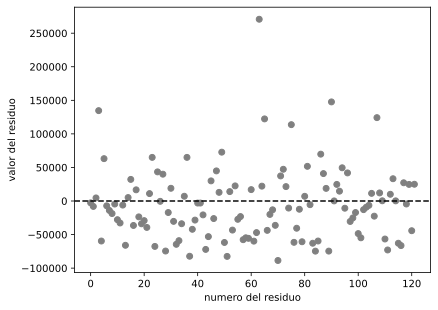

In [114]:
plt.scatter(range(l_residuos),compare['Errores'], color = 'gray')
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.xlabel('numero del residuo')
plt.ylabel('valor del residuo')

Dado el histograma de errores anterior, podemos notar que la mayoría de errores se encuentra lejos del 0, llegando a valores que superan incluso los 250,000, no obstante, la mayoría de errores se encuentran en un rango de aproximado de (-90,000,70,000). Por ello, está gráfica sugiere que el modelo no está haciendo buenas predicciones en general.

Aunado a lo anterior, no parece haber un patrón específico en la distribución de los residuos a lo largo del número de residuo, lo que indica que no hay tendencias sistemáticas en los errores del modelo.

### Histograma de residuos

El histograma de los residuos muestra la distribución de los errores del modelo. Los residuos son las diferencias entre los valores reales y las predicciones. En este caso, los residuos se representan en el eje x, mientras que la frecuencia (probabilidad) se representa en el eje y.

Text(0, 0.5, 'Frecuencia (proba)')

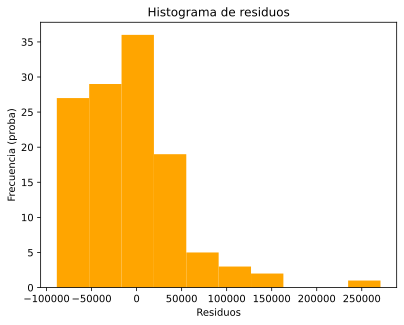

In [115]:
plt.hist(x = compare['Errores'], color = 'orange')
plt.title("Histograma de residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (proba)")

El histograma resultante está relativamente centrado en 0 a pesar de no ser muy simétrico. Los espacios en las colas podrían indicar cierta heterogeneidad en los errores.

En la siguiente sección, calculamos la media (`media`) y la desviación estándar (`std`) de los residuos. La media representa el promedio de los errores, lo que nos da una idea de si hay un sesgo sistemático en las predicciones del modelo. La desviación estándar mide la dispersión de los errores alrededor de la media y nos indica la variabilidad de los residuos.

Posteriormente, normalizamos los errores utilizando la fórmula $\frac{\text{Valor} - \text{Media}}{\text{Desviación estándar}}$.

Esta normalización transforma los errores en una escala común que tiene una media de cero y una desviación estándar de uno. Esta normalización es útil para comparar y analizar los errores de manera más efectiva, especialmente cuando tienen diferentes magnitudes y escalas.

In [116]:
media = compare['Errores'].mean()
std = compare["Errores"].std()
Error_est = (compare['Errores']-media)/std

### QQ - Plot de Normalidad de Residuos:

El gráfico QQ (Quantile-Quantile) compara los cuantiles teóricos de una distribución (en este caso, una distribución normal) con los cuantiles de la muestra de residuos estandarizados.

Los puntos que más se acercan a la línea de 45° son aquellos que se distribuyen de manera normal. Los puntos que se desvían de la línea de 45°, son aquellos que se desvían de la normalidad.

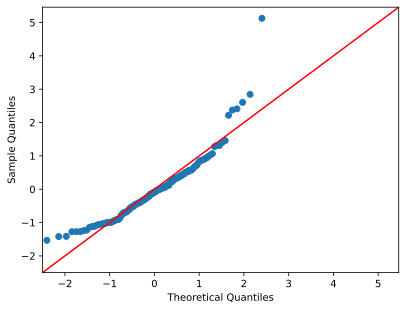

In [117]:
qqplot= sm.qqplot(Error_est, line = '45')

En el gráfico QQ obtenido, la mayoría de los puntos siguen aproximadamente una línea diagonal (45°), lo que sugiere que los residuos podrían estar distribuidos de manera normal. Sin embargo, hay algunas desviaciones en los extremos, lo que indica que los residuos podrían tener colas más pesadas que las de una distribución normal.

### Test de Kolmogórov-Smirnov

Por último, debido a la incertidumbre existente en los gráficos anteriores de los residuos, realizamos un test de Kolmogorov-Smirnov para evaluar si estos se ajustan a una distribución normal. La prueba compara la distribución acumulativa empírica de los residuos con la distribución acumulativa teórica de una distribución normal. Si el valor p resultante es alto (generalmente > 0.05), no se puede rechazar la hipótesis nula de que los residuos siguen una distribución normal.

In [118]:
from scipy import stats
stats.kstest(Error_est, 'norm')

KstestResult(statistic=0.08685395624443903, pvalue=0.29865594923087074, statistic_location=0.5722530746500549, statistic_sign=1)

Dado que el valor p obtenido es de 0.2968, podemos decir que nuestros residuos se distribuyen de manera normal.

## Conclusión

En la presente actividad, se ha llevado a cabo un análisis exhaustivo de un modelo de regresión lineal para predecir salarios (en USD) en función de múltiples variables predictoras (nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio)). El objetivo era comprender la calidad del modelo y su capacidad para explicar la variabilidad en los datos. A pesar de haber obtenido un valor bajo de $R^2$ (coeficiente de determinación), junto con la confirmación de una distribución normal de los errores, es crucial considerar diversos factores para interpretar estos resultados de manera adecuada.

El $R^2$ bajo, en este caso, indica que el modelo no está logrando explicar una gran parte de la variabilidad observada en los datos. Esto podría deberse a varias razones, como la falta de variables relevantes, relaciones no lineales o un tamaño de muestra pequeño. A pesar de ello, la distribución normal de los errores sugiere que el modelo está en línea con las suposiciones clave de la regresión lineal y que los errores se distribuyen de manera coherente.

Asimismo, se consideró el p-valor para evaluar la significancia de los coeficientes de las variables predictoras en relación con la variable dependiente, ya que este nos indica si existe una relación estadísticamente significativa entre cada variable predictora y la variable dependiente. Por la razón anterior, únicamente se consideraron los coeficientes con un p-valor menor a 0.05 para la construcción del modelo final.

En resumen, una regresión lineal no describe los datos de nuestro DataFrame presentado, por lo que algunas soluciones a esto podrían ser implementar modelos no lineales, de ser posible aumentar el tamaño de la muestra y evaluar la relevancia de las varibales predictoras presentadas (agregar otras que podrían capturar mejor la variabilidad).




---

Alfonso Pineda Cedillo | A01660394
